In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1269.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/623.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/820.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1354.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/45.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/369.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1711.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1173.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1488.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/436.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1409.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/71.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1055.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/215.jpg
/

# **Importing The Necessary LIBS**

In [2]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Dropout,Conv2D,InputLayer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

# **Import the train and test datasets**

In [3]:
train_dir=r"/kaggle/input/skin-cancer-malignant-vs-benign/train/"
test_dir=r"/kaggle/input/skin-cancer-malignant-vs-benign/test/"

# **Preprocessing The Data**

In [4]:
categories = ['benign','malignant']
y_train = []
x_train = []
x_test = []
y_test = []
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 10

In [5]:
from PIL import Image
def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

image_path='/kaggle/input/skin-cancer-malignant-vs-benign/train/malignant/728.jpg'
width, height = get_image_size(image_path)
print(f"Image size: {width}x{height}")

Image size: 224x224


# **Reading The Images From The Train Dataset**

In [6]:
for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(224,224))
        image = image / 255
        x_train.append(image)
        y_train.append(category)

# **Reading The Images From The Test Dataset**

In [7]:
for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(224,224))
        image = image / 255
        x_test.append(image)
        y_test.append(category)

# **Preprocessing The Data And Label**

In [8]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train,num_classes=2)
y_test = lb.fit_transform(y_test)
y_test = to_categorical(y_test,num_classes=2)

In [9]:
x_train = np.array(x_train,dtype='float32')
y_train = np.array(y_train,dtype='float32')
x_test = np.array(x_test,dtype='float32')
y_test = np.array(y_test,dtype='float32')

# **Creating the CNN Model**

In [14]:
model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2,activation='softmax'))

# **Compiling The Model**

In [15]:
#Regularization
opt = Adam(learning_rate=INIT_LR,weight_decay=INIT_LR/Batch_Size)

In [16]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
validation_steps = len(y_test) // Batch_Size
History = model.fit(
    x_train,
    y_train,
    epochs=EPOCHES,
    steps_per_epoch=len(x_train)//Batch_Size,
    batch_size=Batch_Size,
    validation_steps=validation_steps
)

Epoch 1/10
82/82 [==============================] - 122s 1s/step - loss: 0.5702 - accuracy: 0.7058
Epoch 2/10
82/82 [==============================] - 122s 1s/step - loss: 0.5151 - accuracy: 0.7459
Epoch 3/10
82/82 [==============================] - 119s 1s/step - loss: 0.4513 - accuracy: 0.7812
Epoch 4/10
82/82 [==============================] - 118s 1s/step - loss: 0.4308 - accuracy: 0.7992
Epoch 5/10
82/82 [==============================] - 119s 1s/step - loss: 0.4261 - accuracy: 0.7942
Epoch 6/10
82/82 [==============================] - 120s 1s/step - loss: 0.4091 - accuracy: 0.7954
Epoch 7/10
82/82 [==============================] - 120s 1s/step - loss: 0.4049 - accuracy: 0.7992
Epoch 8/10
82/82 [==============================] - 120s 1s/step - loss: 0.4080 - accuracy: 0.7958
Epoch 9/10
82/82 [==============================] - 120s 1s/step - loss: 0.3889 - accuracy: 0.8096
Epoch 10/10
82/82 [==============================] - 119s 1s/step - loss: 0.3787 - accuracy: 0.8123


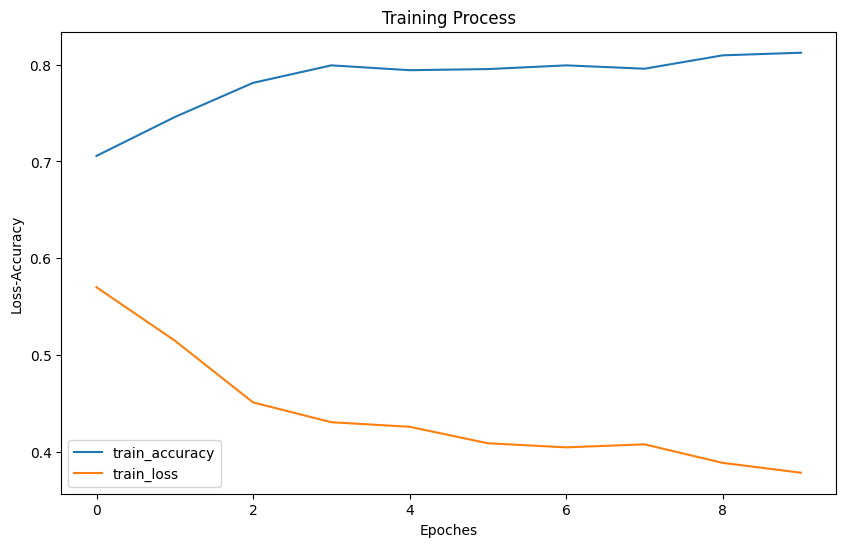

In [19]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,10),History.history['accuracy'],label='train_accuracy')
plt.plot(np.arange(0,10),History.history['loss'],label='train_loss')
plt.xlabel('Epoches')
plt.ylabel('Loss-Accuracy')
plt.title('Training Process')
plt.legend(loc='lower left')
plt.show()